# Staistical analysis on wine quality by Tolga Keskinoglu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data, and take a look
df = pd.read_csv('winequality-red.csv')
print(df.shape)
df.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Let's check for sparisty
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
# and missing values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
# Let's seperate the quality column as our target
y = df['quality']
X = df.drop(['quality'], axis=1)

X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


## Dimensionality Reduction via PCA

In [6]:
from sklearn.decomposition import PCA

### Explained variance:
- Statistical metric that measures the proportion of the total variance in a dataset that is captured or "explained" by a particular set of variables or components
- Explained variance by each principal component is represented by its corresponding eigenvalue
- Explained variance ratio for a principal component is the ratio of its eigenvalue to the sum of all eigenvalues
- Provides insights into the importance of each principal component. Components with higher explained variance are more influential in describing the underlying structure of the data
- A high cumulative explained variance suggests that the selected principal components effectively capture the variability in the data, allowing for meaningful dimensionality reduction

In [7]:
# First we normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_normalized = scaler.fit_transform(X)

In [8]:
# Compute PCA
pca = PCA().fit(X_normalized)

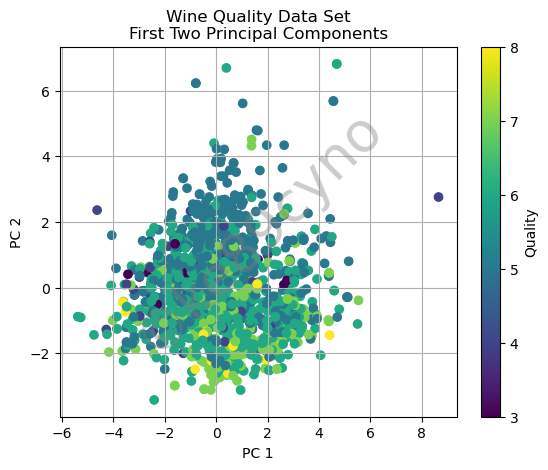

In [9]:
# Let's project the data onto the first two PCs and plot them
X_pca = pca.transform(X_normalized)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Wine Quality Data Set\nFirst Two Principal Components')

plt.grid(True)  # Add grid
cbar = plt.colorbar(scatter)
cbar.set_label('Quality')

# Add watermark
xlim = plt.gca().get_xlim()  # Get the x limits of the current axes
ylim = plt.gca().get_ylim()  # Get the y limits of the current axes
plt.text((xlim[0] + xlim[1]) / 2, (ylim[0] + ylim[1]) / 2, '©ke89cyno', fontsize= plt.rcParams['font.size']+30,color='gray', ha='center', va='center', alpha=0.4, rotation=45)


plt.show()

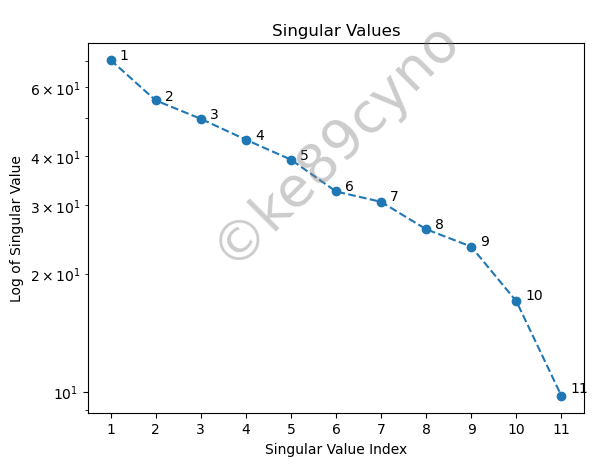

In [10]:
# Let's plot the log-adjusted singular values
x_indices = np.arange(1, len(pca.explained_variance_ratio_) + 1)

plt.xticks(x_indices)

plt.semilogy(x_indices, pca.singular_values_, '--o')
plt.xlabel('Singular Value Index')
plt.ylabel('Log of Singular Value')
plt.title('Singular Values')

## REVIEW
# Add x-indices to the points
for i, value in enumerate(pca.singular_values_):
    plt.text(x_indices[i]+0.2, value+0.2, str(x_indices[i]))

# Add watermark
xlim = plt.gca().get_xlim()  # Get the x limits of the current axes
ylim = plt.gca().get_ylim()  # Get the y limits of the current axes
plt.text((xlim[0] + xlim[1]) / 2, (ylim[0] + ylim[1]) / 2, '©ke89cyno', fontsize= plt.rcParams['font.size']+30,color='gray', ha='center', va='center', alpha=0.4, rotation=45)

plt.show()

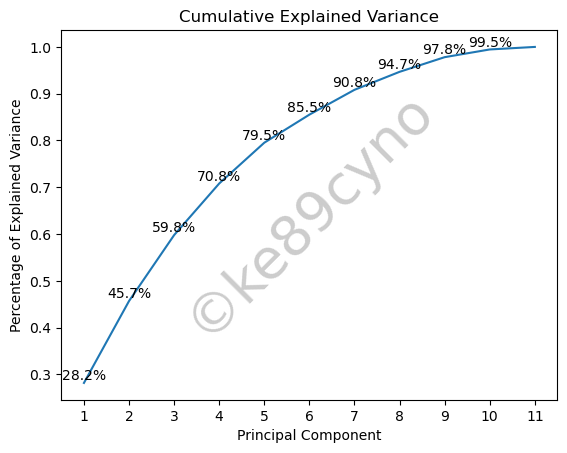

In [11]:
# Let's take a look at the cumulative sum of the explained variance
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Explained Variance')
plt.title('Cumulative Explained Variance')

plt.xticks(x_indices)

## REVIEW
# Add labels for each point
for i, ratio in enumerate(np.cumsum(pca.explained_variance_ratio_)):
    if ratio < 0.999:
        plt.text(i+1, ratio, f'{ratio:1.1%}', ha='center', va='bottom')

# Add watermark
xlim = plt.gca().get_xlim()  # Get the x limits of the current axes
ylim = plt.gca().get_ylim()  # Get the y limits of the current axes
plt.text((xlim[0] + xlim[1]) / 2, (ylim[0] + ylim[1]) / 2, '©ke89cyno', fontsize= plt.rcParams['font.size']+30,color='gray', ha='center', va='center', alpha=0.4, rotation=45)

plt.show()

We can explain 45.7% of the variance with the first two principal components. We'll use that for some general-purpose plotting and visualization but it's unlikely that the first two components would be enough for an accurate predictive model.

## Data exploration via t-SNE and UMAP
Let's explore how seperable the data is on our target value of *quality*. We'll start by getting a better understading of the target.

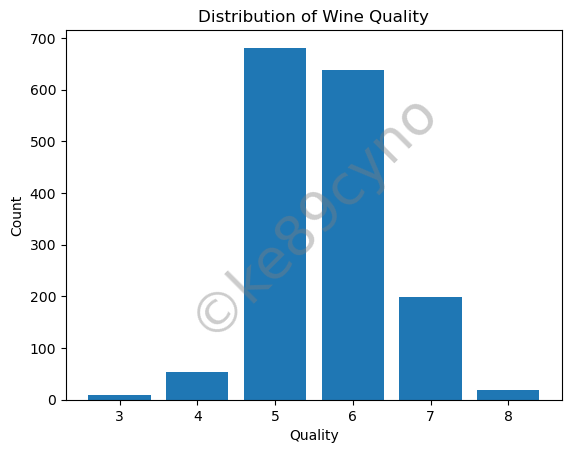

In [12]:
# Let's take a look at the nature of the target variable
plt.bar(y.value_counts().sort_index(ascending=True).index, y.value_counts().sort_index(ascending=True).values)

plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality')

# Add watermark
xlim = plt.gca().get_xlim()  # Get the x limits of the current axes
ylim = plt.gca().get_ylim()  # Get the y limits of the current axes
plt.text((xlim[0] + xlim[1]) / 2, (ylim[0] + ylim[1]) / 2, '©ke89cyno', fontsize= plt.rcParams['font.size']+30,color='gray', ha='center', va='center', alpha=0.4, rotation=45)

plt.show()

### t-SNE

In [13]:
from sklearn.manifold import TSNE

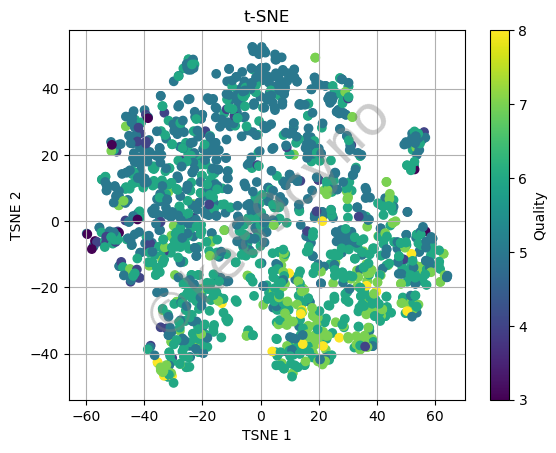

In [14]:
tsne = TSNE(n_components=2)

# Fit the TSNE model
X_tsne = tsne.fit_transform(X_normalized)

# Plot the TSNE results
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)

plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('t-SNE')

plt.grid(True)  # Add grid
cbar = plt.colorbar(scatter)
cbar.set_label('Quality')

# Add watermark
xlim = plt.gca().get_xlim()  # Get the x limits of the current axes
ylim = plt.gca().get_ylim()  # Get the y limits of the current axes
plt.text((xlim[0] + xlim[1]) / 2, (ylim[0] + ylim[1]) / 2, '©ke89cyno', fontsize= plt.rcParams['font.size']+30,color='gray', ha='center', va='center', alpha=0.4, rotation=45)

plt.show()

### UMAP

In [15]:
%%capture --no-display
import umap

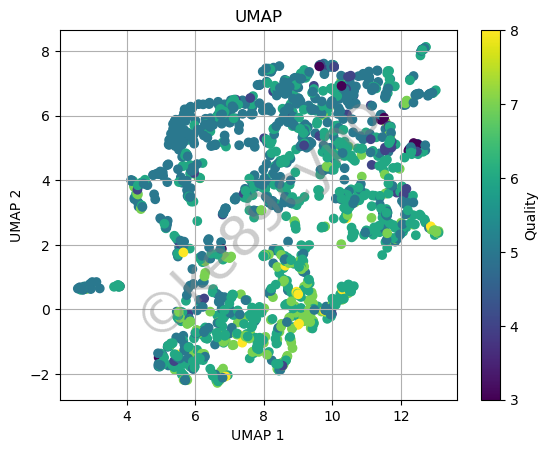

In [16]:
# Fit the UMAP model
X_umap = umap.UMAP(n_components=2).fit_transform(X_normalized)

# Plot the UMAP results
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP')

plt.grid(True)  # Add grid
cbar = plt.colorbar(scatter)
cbar.set_label('Quality')

# Add watermark
xlim = plt.gca().get_xlim()  # Get the x limits of the current axes
ylim = plt.gca().get_ylim()  # Get the y limits of the current axes
plt.text((xlim[0] + xlim[1]) / 2, (ylim[0] + ylim[1]) / 2, '©ke89cyno', fontsize= plt.rcParams['font.size']+30,color='gray', ha='center', va='center', alpha=0.4, rotation=45)

plt.show()

## Data exploration via statistics
Let's start off by taking a look at how each variable affects quality and see if there is a pattern.

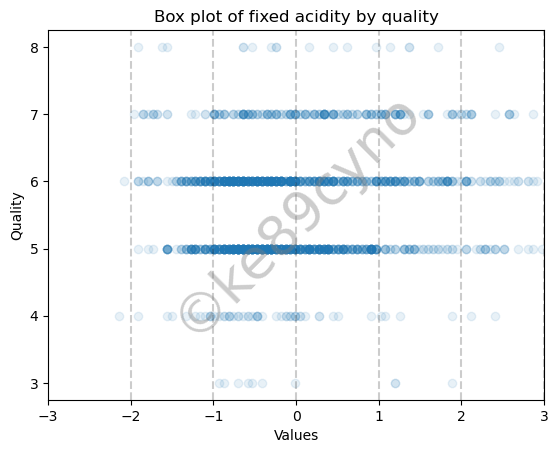

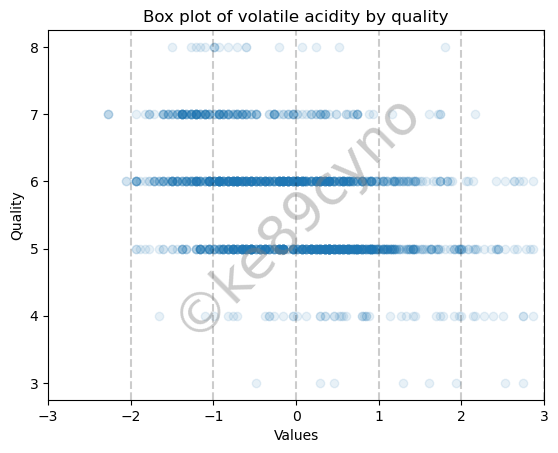

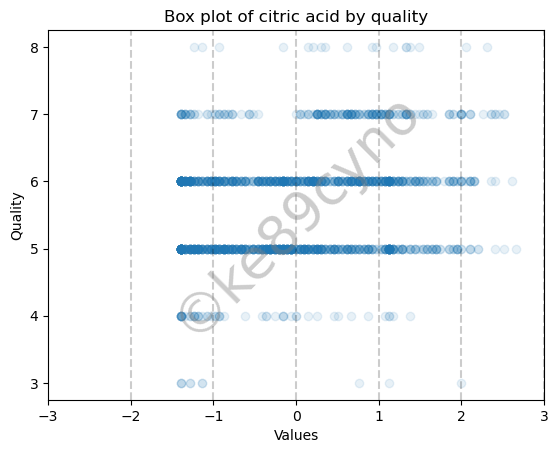

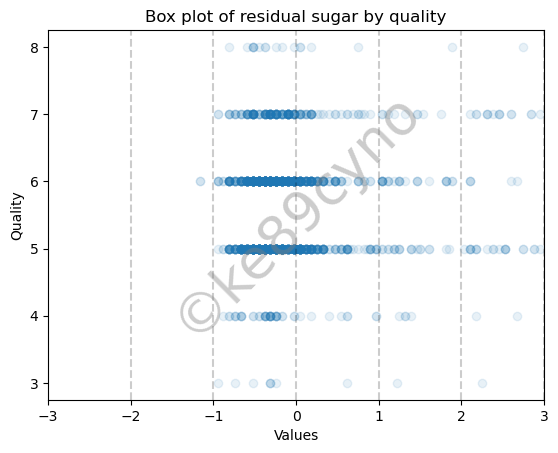

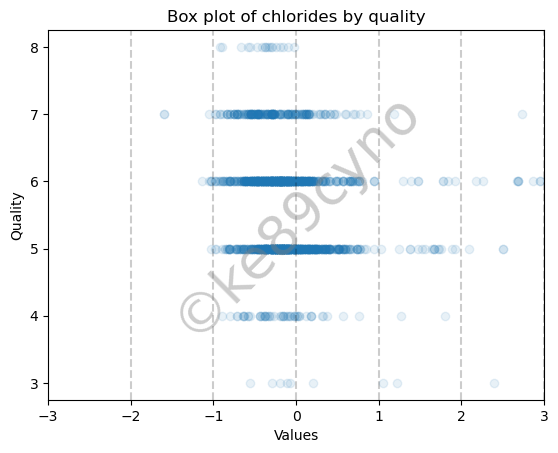

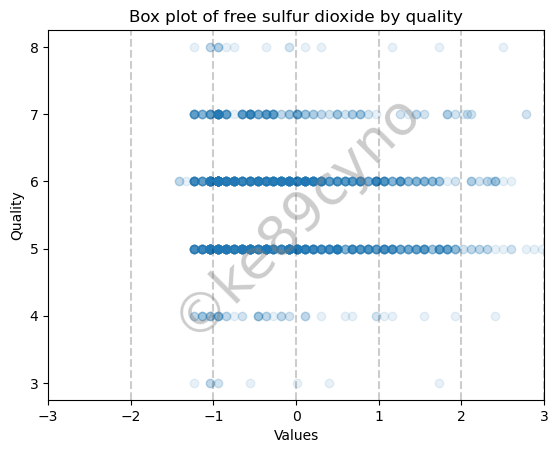

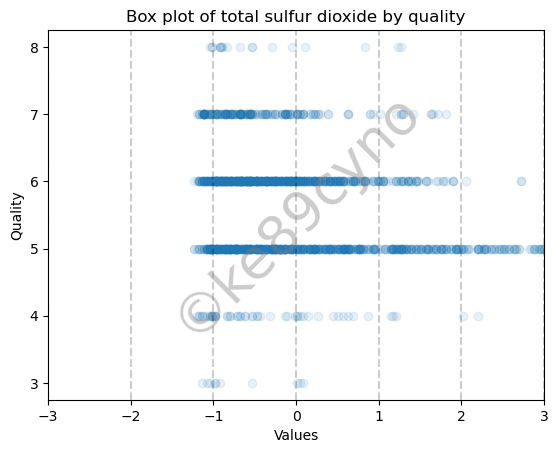

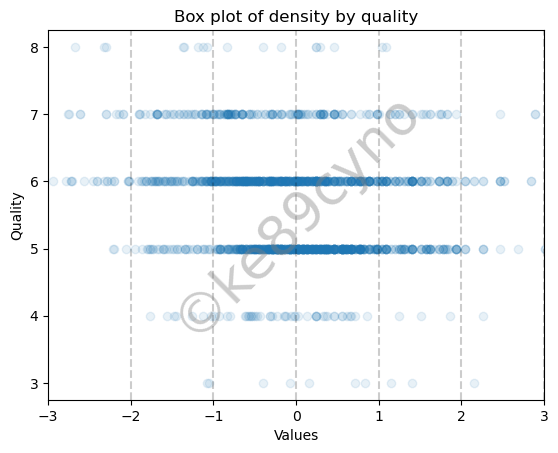

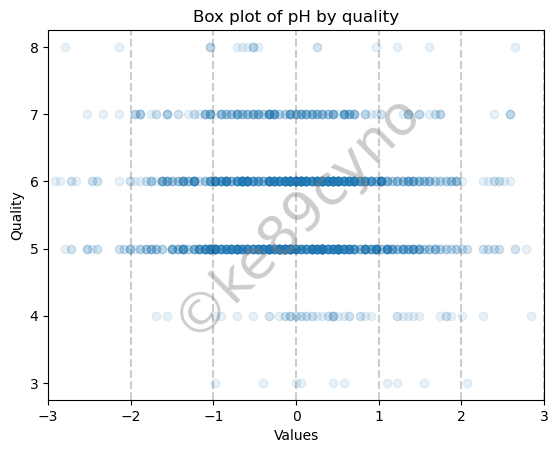

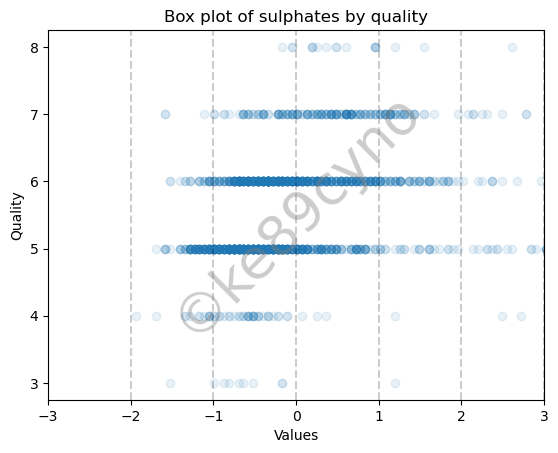

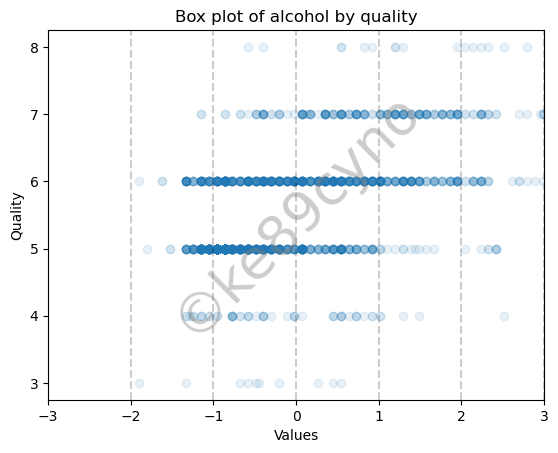

In [17]:
# Let's create a scatter plot for each feature against the target
X_scaled = pd.DataFrame(X_normalized, columns=X.columns)

for feature in X.columns:
    df_scaled = pd.concat([X_scaled, y], axis=1)
    #df_scaled.boxplot(column=feature, by='quality', vert=False, grid=False)
    plt.scatter(df_scaled[feature], df_scaled['quality'], alpha=0.1)
    plt.xlim(-3, 3)
    plt.xlabel('Values')
    plt.ylabel('Quality')
    plt.title(f'Box plot of {feature} by quality')
    plt.suptitle('')  # Suppress the automatic title

# Add vertical lines at each x tick interval
    for x in plt.xticks()[0]:
        plt.axvline(x=x, color='k', linestyle='--', alpha=0.2)

# Add watermark
    xlim = plt.gca().get_xlim()  # Get the x limits of the current axes
    ylim = plt.gca().get_ylim()  # Get the y limits of the current axes
    plt.text((xlim[0] + xlim[1]) / 2, (ylim[0] + ylim[1]) / 2, '©ke89cyno', fontsize= plt.rcParams['font.size']+30,color='gray', ha='center', va='center', alpha=0.4, rotation=45)

    plt.show()

### Sulfates
It appears that there may be a relationship between *sulfates* and *quality*. We explore this further by calulating Spearman's rank correlation coefficient, which will show us if there is a monotonic relationship between *sulfates* and *quality*, even if that relationship is nonlinear.

In [18]:
# Let's calculate Spearman's rank correlation coefficient
from scipy.stats import spearmanr

# Create a dataframe to store the results
df_spearman = pd.DataFrame(columns=['feature', 'spearman_r', 'p-value'])

# Calculate the correlation for each feature
for feature in X.columns:
    spearman_corr, p_value = spearmanr(X[feature], y)
    df_spearman = df_spearman.append({'feature': feature, 'spearman_r': spearman_corr, 'p-value': p_value}, ignore_index=True)

# Sort the dataframe by correlation coefficient
df_spearman.sort_values(by='spearman_r', ascending=False)

C:\Users\Tolga\AppData\Local\Temp\ipykernel_5340\3413098517.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spearman = df_spearman.append({'feature': feature, 'spearman_r': spearman_corr, 'p-value': p_value}, ignore_index=True)
C:\Users\Tolga\AppData\Local\Temp\ipykernel_5340\3413098517.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spearman = df_spearman.append({'feature': feature, 'spearman_r': spearman_corr, 'p-value': p_value}, ignore_index=True)
C:\Users\Tolga\AppData\Local\Temp\ipykernel_5340\3413098517.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_spearman = df_spearman.append({'feature': feature, 'spearman_r': spearman_corr, 'p-value': p_value}, ignore_index=True)
C:\Users\Tolga\AppData\Lo

,feature,spearman_r,p-value
10,alcohol,0.478532,2.726838e-92
9,sulphates,0.377060,3.477695e-55
2,citric acid,0.213481,6.158952e-18
0,fixed acidity,0.114084,4.801220e-06
3,residual sugar,0.032048,2.002454e-01
8,pH,-0.043672,8.084594e-02
5,free sulfur dioxide,-0.056901,2.288322e-02
7,density,-0.177074,9.918139e-13
4,chlorides,-0.189922,1.882858e-14
6,total sulfur dioxide,-0.196735,2.046488e-15


In [19]:
# Let's check for linear relationships by calculating the Pearson correlation coefficient
from scipy.stats import pearsonr

# Create a dataframe to store the results
df_pearson = pd.DataFrame(columns=['feature', 'pearson_r', 'p-value'])

# Calculate the correlation for each feature
for feature in X.columns:
    pearson_corr, p_value = pearsonr(X[feature], y)
    df_pearson = df_pearson.append({'feature': feature, 'pearson_r': pearson_corr, 'p-value': p_value}, ignore_index=True)

# Sort the dataframe by correlation coefficient
df_pearson.sort_values(by='pearson_r', ascending=False)

C:\Users\Tolga\AppData\Local\Temp\ipykernel_5340\3183915133.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pearson = df_pearson.append({'feature': feature, 'pearson_r': pearson_corr, 'p-value': p_value}, ignore_index=True)
C:\Users\Tolga\AppData\Local\Temp\ipykernel_5340\3183915133.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pearson = df_pearson.append({'feature': feature, 'pearson_r': pearson_corr, 'p-value': p_value}, ignore_index=True)
C:\Users\Tolga\AppData\Local\Temp\ipykernel_5340\3183915133.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pearson = df_pearson.append({'feature': feature, 'pearson_r': pearson_corr, 'p-value': p_value}, ignore_index=True)
C:\Users\Tolga\AppData\Local\Temp\ipy

,feature,pearson_r,p-value
10,alcohol,0.476166,2.831477e-91
9,sulphates,0.251397,1.802088e-24
2,citric acid,0.226373,4.991295e-20
0,fixed acidity,0.124052,6.495635e-07
3,residual sugar,0.013732,5.832180e-01
5,free sulfur dioxide,-0.050656,4.283398e-02
8,pH,-0.057731,2.096278e-02
4,chlorides,-0.128907,2.313383e-07
7,density,-0.174919,1.874957e-12
6,total sulfur dioxide,-0.185100,8.621703e-14


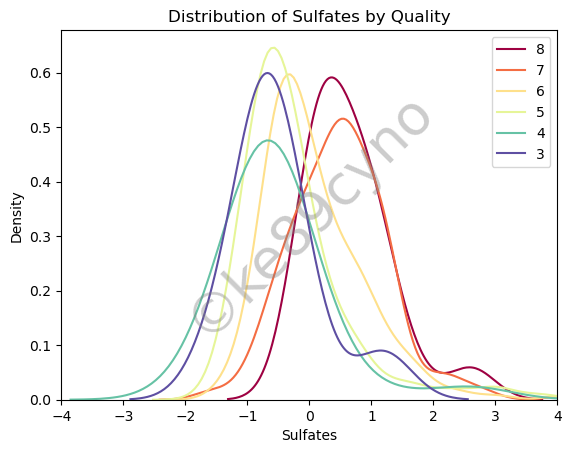

In [20]:
import seaborn as sns
import matplotlib.cm as cm

# Sort the unique quality values in descending order
quality_values = df_scaled['quality'].unique()
quality_values = sorted(quality_values, reverse=True)

# Create a colormap
cmap = cm.get_cmap('Spectral')  # 'Spectral' is an example of a colormap
colors = cmap(np.linspace(0, 1, len(quality_values)))

# Plot KDEs of the distribution of sulphates and quality
for quality, color in zip(quality_values, colors):
    sns.kdeplot(df_scaled[df_scaled['quality'] == quality]['sulphates'], label=quality, color=color)

plt.xlim(-4, 4)

plt.xlabel('Sulfates')
plt.ylabel('Density')
plt.title('Distribution of Sulfates by Quality')
plt.legend()

# Add watermark
xlim = plt.gca().get_xlim()  # Get the x limits of the current axes
ylim = plt.gca().get_ylim()  # Get the y limits of the current axes
plt.text((xlim[0] + xlim[1]) / 2, (ylim[0] + ylim[1]) / 2, '©ke89cyno', fontsize= plt.rcParams['font.size']+30,color='gray', ha='center', va='center', alpha=0.4, rotation=45)


plt.show()

Altough it's a litte busy, we may be able to seperate 7 and 8 ("good") from the rest.

It also appears as though the data may be normally distributed. Let's check this out for both sulfates and quality using a QQ plot.

## Hypothesis
H0: there is no difference in the distribution between *sulfites* and *quality*, when grouped into [3,4,5,6] (standard) and [7,8] (premium).

H1: there is a difference in the distribution between *sulfites* and *quality*, when grouped into [3,4,5,6] (standard) and [7,8] (premium).

### Grouping wine by quality

In [21]:
# We group the wine by quality. [3, 4, 5, 6] are standard quality, [7, 8] are premium quality.
df_grouped = df.copy()
df_grouped['quality_group'] = df_grouped['quality'].apply(lambda x: 'standard' if x in [3, 4, 5, 6] else 'premium')
df_grouped.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_group
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,standard
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,standard
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,standard
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,standard
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,standard


### Test for normal distribution

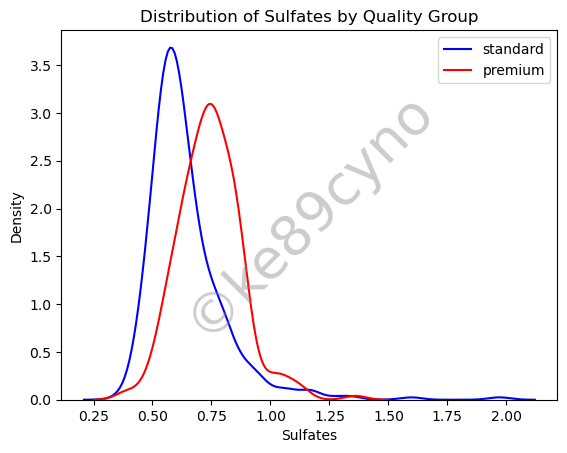

In [22]:
# Let's plot the distribution of sulphates by quality group
for quality_group, color in zip(['standard', 'premium'], ['blue', 'red']):
    sns.kdeplot(df_grouped[df_grouped['quality_group'] == quality_group]['sulphates'], label=quality_group, color=color)

plt.xlabel('Sulfates')
plt.ylabel('Density')
plt.title('Distribution of Sulfates by Quality Group')
plt.legend()

# Add watermark
xlim = plt.gca().get_xlim()  # Get the x limits of the current axes
ylim = plt.gca().get_ylim()  # Get the y limits of the current axes
plt.text((xlim[0] + xlim[1]) / 2, (ylim[0] + ylim[1]) / 2, '©ke89cyno', fontsize= plt.rcParams['font.size']+30,color='gray', ha='center', va='center', alpha=0.4, rotation=45)

plt.show()

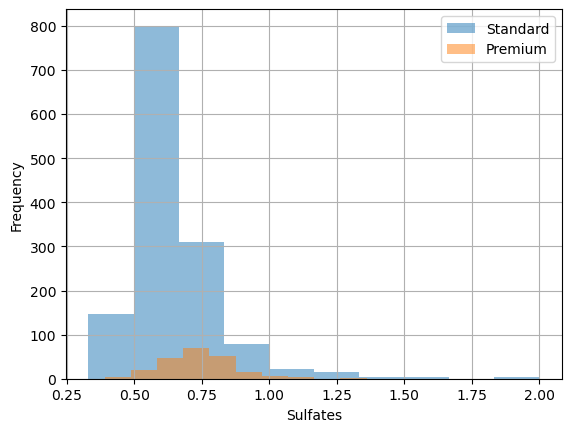

In [23]:
df_grouped[df_grouped['quality_group'] == 'standard']['sulphates'].hist(alpha=0.5)
df_grouped[df_grouped['quality_group'] == 'premium']['sulphates'].hist(alpha=0.5)

plt.xlabel('Sulfates')
plt.ylabel('Frequency')
plt.legend(['Standard', 'Premium'])

# Add watermark
xlim = plt.gca().get_xlim()  # Get the x limits of the current axes
ylim = plt.gca().get_ylim()  # Get the y limits of the current axes
plt.text((xlim[0] + xlim[1]) / 2, (ylim[0] + ylim[1]) / 2, '©ke89cyno', fontsize= plt.rcParams['font.size']+30,color='gray', ha='center', va='center', alpha=0.4, rotation=45)

plt.show()

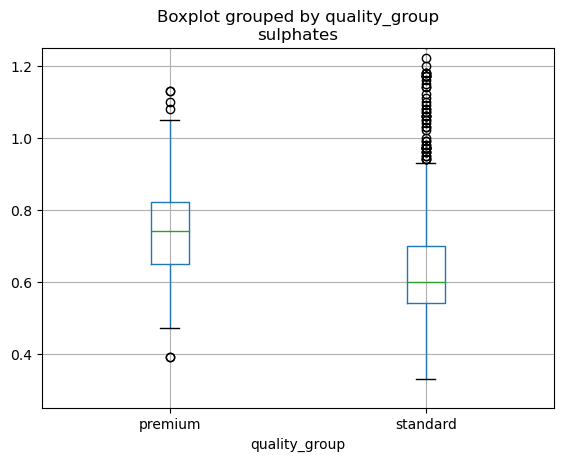

In [24]:
df_grouped.boxplot(column='sulphates', by='quality_group')
plt.ylim(0.25, 1.25)

# Add watermark
xlim = plt.gca().get_xlim()  # Get the x limits of the current axes
ylim = plt.gca().get_ylim()  # Get the y limits of the current axes
plt.text((xlim[0] + xlim[1]) / 2, (ylim[0] + ylim[1]) / 2, '©ke89cyno', fontsize= plt.rcParams['font.size']+30,color='gray', ha='center', va='center', alpha=0.4, rotation=45)

plt.show()

### QQ Plot

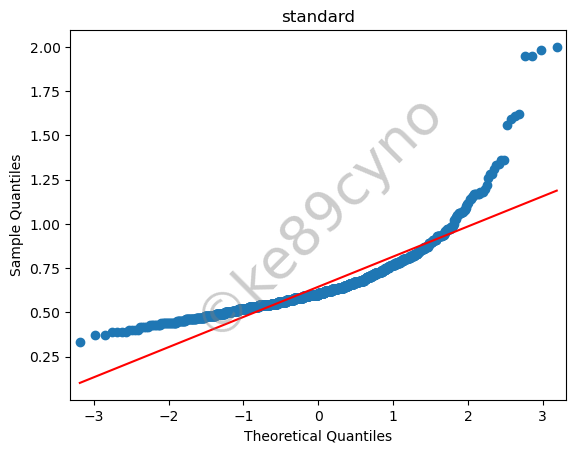

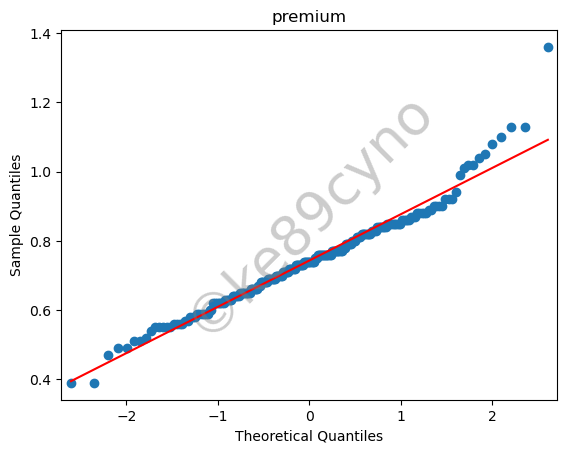

In [32]:
import statsmodels.api as sm

# --> if the data is normally distributed, the points should be on the red line
sm.qqplot(df_grouped[df_grouped['quality_group'] == 'standard']['sulphates'], line='s')
plt.title('standard')

# Add watermark
xlim = plt.gca().get_xlim()  # Get the x limits of the current axes
ylim = plt.gca().get_ylim()  # Get the y limits of the current axes
plt.text((xlim[0] + xlim[1]) / 2, (ylim[0] + ylim[1]) / 2, '©ke89cyno', fontsize= plt.rcParams['font.size']+30,color='gray', ha='center', va='center', alpha=0.4, rotation=45)

sm.qqplot(df_grouped[df_grouped['quality_group'] == 'premium']['sulphates'], line='s')
plt.title('premium')

# Add watermark
xlim = plt.gca().get_xlim()  # Get the x limits of the current axes
ylim = plt.gca().get_ylim()  # Get the y limits of the current axes
plt.text((xlim[0] + xlim[1]) / 2, (ylim[0] + ylim[1]) / 2, '©ke89cyno', fontsize= plt.rcParams['font.size']+30,color='gray', ha='center', va='center', alpha=0.4, rotation=45)

plt.show()

It appears that the *standard* quality wine may have a non-linear distribution and the *premium* wines may have a linear distribtion. This suggests that the two distributions are not the same.

In [26]:
# Let's test our hypothesis using the Mann–Whitney U test. Recall:
# H0: there is no difference in the distribution between *sulfites* and *quality*, when grouped into [3,4,5,6] and [7,8].
# H1: there is a difference in the distribution between *sulfites* and *quality*, when grouped into [3,4,5,6] and [7,8].

from scipy.stats import mannwhitneyu

# Calculate the Mann-Whitney U statistic
U_statistic, p_value = mannwhitneyu(df_grouped[df_grouped['quality_group'] == 'standard']['sulphates'], df_grouped[df_grouped['quality_group'] == 'premium']['sulphates'])

U_max = len(df_grouped[df_grouped['quality_group'] == 'standard']['sulphates']) * len(df_grouped[df_grouped['quality_group'] == 'premium']['sulphates'])

print(f'p-value: {p_value}')

p-value: 9.235903628459924e-30


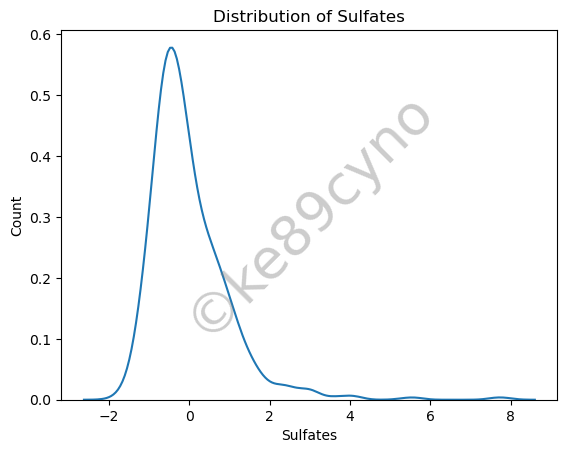

In [27]:
# Let's plot a histogram of sulphates
#plt.hist(df['sulphates'], bins=50)
sns.kdeplot(df_scaled['sulphates'])

plt.xlabel('Sulfates')
plt.ylabel('Count')
plt.title('Distribution of Sulfates')

# Add watermark
xlim = plt.gca().get_xlim()  # Get the x limits of the current axes
ylim = plt.gca().get_ylim()  # Get the y limits of the current axes
plt.text((xlim[0] + xlim[1]) / 2, (ylim[0] + ylim[1]) / 2, '©ke89cyno', fontsize= plt.rcParams['font.size']+30,color='gray', ha='center', va='center', alpha=0.4, rotation=45)

plt.show()

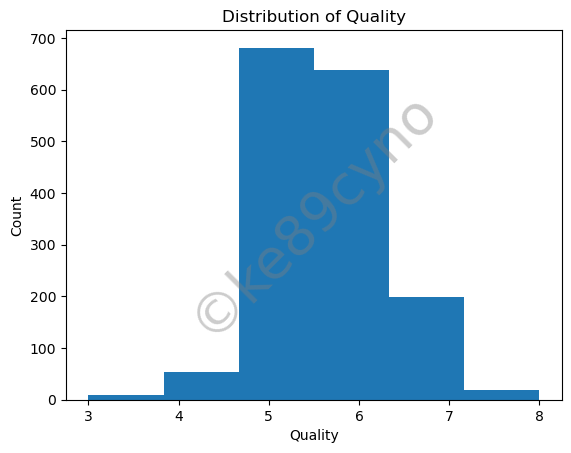

In [28]:
# Let's plot a histogram of quality
plt.hist(df['quality'], bins= 6)

plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Quality')

# Add watermark
xlim = plt.gca().get_xlim()  # Get the x limits of the current axes
ylim = plt.gca().get_ylim()  # Get the y limits of the current axes
plt.text((xlim[0] + xlim[1]) / 2, (ylim[0] + ylim[1]) / 2, '©ke89cyno', fontsize= plt.rcParams['font.size']+30,color='gray', ha='center', va='center', alpha=0.4, rotation=45)

plt.show()

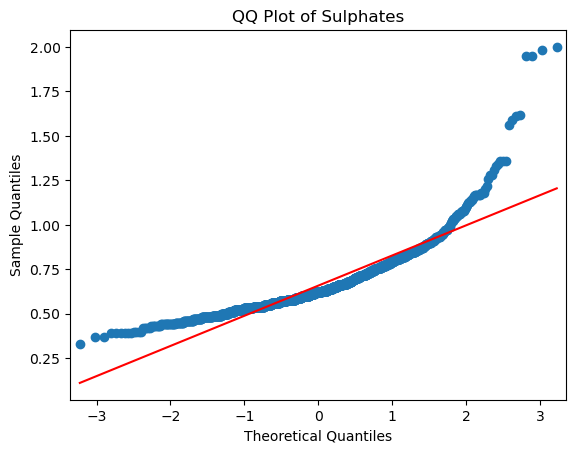

In [29]:
import statsmodels.api as sm

# --> if the data is normally distributed, the points should be on the red line
sm.qqplot(df['sulphates'], line='s')
plt.title('QQ Plot of Sulphates')

plt.show()

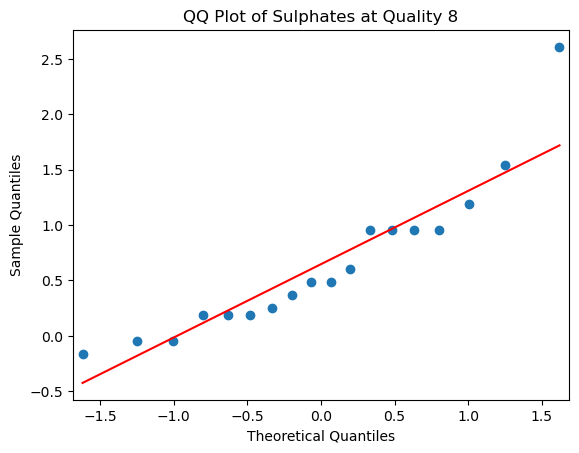

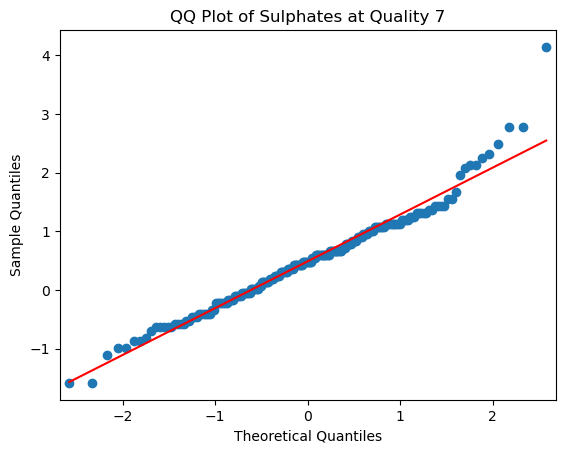

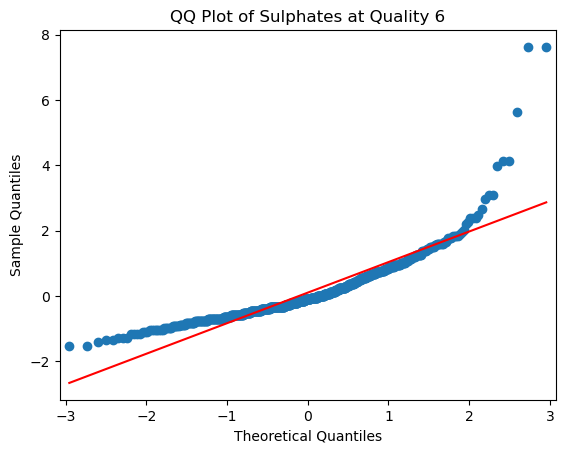

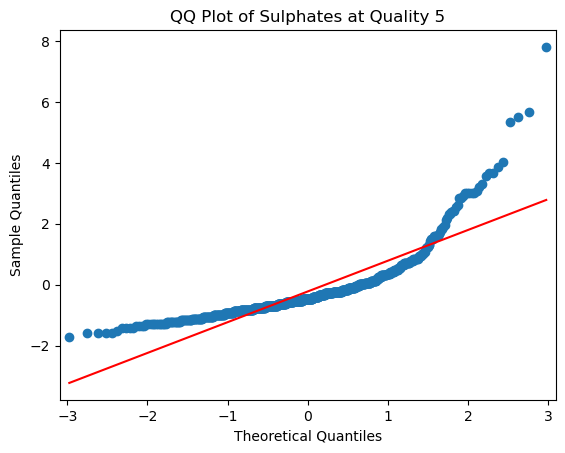

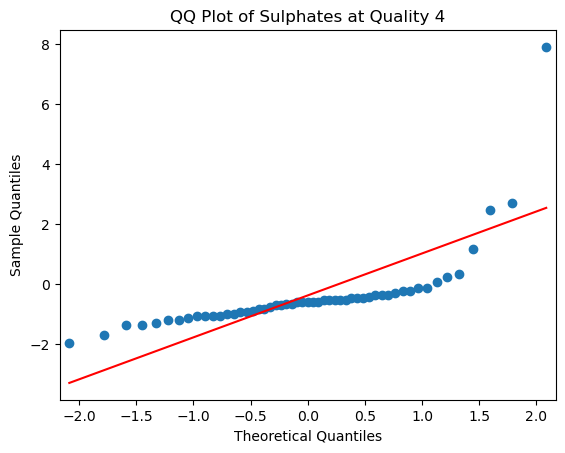

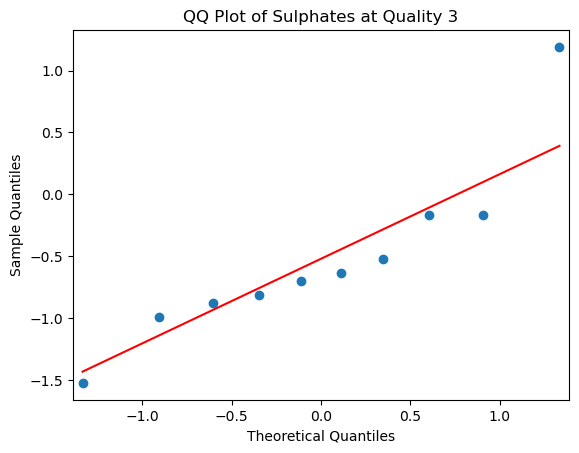

In [30]:
# Let's see if sulphates is normally distributed at each quality level
for quality in quality_values:
    sm.qqplot(df_scaled[df_scaled['quality'] == quality]['sulphates'], line='s')
    plt.title(f'QQ Plot of Sulphates at Quality {quality}')

    plt.show()